In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from matplotlib import ticker
import seaborn as sns

In [40]:
#############################################################################################

In [41]:
import numpy as np
import math

def circular_mean(angles_degrees):
    """
    Calculate the circular mean of angles in degrees.
    
    Parameters:
    angles_degrees (list or array): List of angles in degrees
    
    Returns:
    float: Circular mean in degrees (0-360)
    """
    # Convert degrees to radians
    angles_radians = np.radians(angles_degrees)
    
    # Calculate sum of sines and cosines
    sum_sin = np.sum(np.sin(angles_radians))
    sum_cos = np.sum(np.cos(angles_radians))
    
    # Calculate mean direction
    mean_radians = np.arctan2(sum_sin, sum_cos)
    
    # Convert back to degrees and normalize to 0-360
    mean_degrees = np.degrees(mean_radians)
    
    # Ensure the result is in the range [0, 360)
    mean_degrees = (mean_degrees + 360) % 360
    
    return (mean_degrees)

def circular_std_dev(angles_degrees):
    """
    Calculate the circular standard deviation of angles in degrees.
    
    Parameters:
    angles_degrees (list or array): List of angles in degrees
    
    Returns:
    float: Circular standard deviation in degrees
    """
    # Convert degrees to radians
    angles_radians = np.radians(angles_degrees)
    
    # Calculate sum of sines and cosines
    n = len(angles_radians)
    sum_sin = np.sum(np.sin(angles_radians))
    sum_cos = np.sum(np.cos(angles_radians))
    
    # Calculate mean resultant length (R)
    R = np.sqrt(sum_sin**2 + sum_cos**2) / n
    
    # Calculate circular standard deviation
    std_dev_radians = np.sqrt(-2 * np.log(R))
    
    # Convert back to degrees
    std_dev_degrees = np.degrees(std_dev_radians)
    
    return (std_dev_degrees)



In [42]:
import ast 
def filter_df(torsions, b_factor_lb, b_factor_ub, ring_shapes):

    # Convert the string representation of tuples and lists to actual Python objects
    torsions['BFMP ring shape'] = torsions['BFMP ring shape'].apply(ast.literal_eval)

    # Function to check the BFMP ring shape condition
    def check_ring_shape(ring_shape):
        if isinstance(ring_shape, tuple) and len(ring_shape) == 2:
            if isinstance(ring_shape[1], list) and ring_shape[1] == ring_shapes:
                return True
        return False

    # Function to check B factor condition
    def check_b_factor(b_factor_str):
        try:
            b_factor = ast.literal_eval(b_factor_str)
            if isinstance(b_factor, tuple) and len(b_factor) == 2 and isinstance(b_factor[1], list) and len(b_factor[1]) == 2:
                if b_factor[1][0] <= b_factor_ub and b_factor[1][1] <= b_factor_ub :
                    return True

        except (ValueError, SyntaxError, TypeError):
            return False
        return False

    # Filter the DataFrame based on the condition
    filtered_torsions = torsions[torsions['BFMP ring shape'].apply(check_ring_shape) & torsions['B factor(Avg)'].apply(check_b_factor)]

    return (filtered_torsions)

##### usage #######
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_4D/'
file = 'DGlcpa1-4DGlcpa_ver2.1.csv'
df = pd.read_csv(f'{file_path}{file}')
filtered_df =filter_df(df, 0,30, ['4C1', '4C1'])
# print(filtered_df)



In [43]:
##### usage #######
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_2D/'
file = 'DManpa1-2DManpa_ver2.1.csv'
df = pd.read_csv(f'{file_path}{file}')
filtered_df =filter_df(df, 0,30, ['4C1', '4C1'])
# print(filtered_df)

In [44]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_6D/'
file = 'LFucpa1-6DGlcpNAcb_ver2.1.csv'
df = pd.read_csv(f'{file_path}{file}')
filtered_df =filter_df(df, 0,30, ['1C4', '4C1'])
# print(filtered)

In [45]:
import matplotlib.patches as mpatches

In [46]:
def filter_and_plot(list_linkage):

    # fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, figsize=(8,8))

    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.3)

    # Create subplots with different sizes
    ax1 = fig.add_subplot(gs[1:3, :2])    
    ax2 = fig.add_subplot(gs[1:3, 2:3])  
    ax3 = fig.add_subplot(gs[0:1, :2]) 
    ax4 = fig.add_subplot(gs[0:1, 2:3])       

    for linkage in list_linkage:
        file_path =linkage[0]
        files =linkage[1]
        link =linkage[2]
        title =linkage[3]
        legend_label =linkage[4]   
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7]     

        phi_values = []
        psi_values =[]

        for file in files:        

            if 'ver2.1' in file:
                print(file)
                df = pd.read_csv(f'{file_path}{file}')
                #filter df                
                if file.startswith ('LFucp'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4','4C1'])
                else:
                    df = filter_df(df, 0, 30, ['4C1','4C1'])
                ####################################################
                if not os.path.exists(f'./filter_data/{link}/'):
                    os.makedirs(f'./filter_data/{link}/')
                
                ############### save the filtered data ######################   
                if (df.shape[0]>0):
                    df.to_csv(f'./filter_data/{link}/{file[:-3]}_filtered.csv')
                
                #############################################################

                if df.shape[0] >1:
                    if 'phi' in df.columns:
                            # Append the values to our list
                            temp_phi_list = df['phi'].tolist()
                            phi_values.extend(temp_phi_list)
                            print(f'phi: {circular_mean(temp_phi_list)} , {circular_std_dev(temp_phi_list)}')
                    else:
                        print(f"Warning: 'phi' column not found in {file_path}{file}")

                    if 'psi' in df.columns:
                            # Append the values to our list
                            temp_psi_list = df['psi'].tolist()
                            psi_values.extend(temp_psi_list)
                            print(f'psi: {circular_mean(temp_psi_list)} , {circular_std_dev(temp_psi_list)}')
                    else:
                        print(f"Warning: 'psi' column not found in {file_path}{file}")
                
                    print (len(temp_phi_list))
                    print (len(temp_psi_list))

        x = phi_values
        y = psi_values

        print(f'\n length of the data points :{len(x)},   , {len(y)} \n')
        scatter = ax1.scatter(x, y, linewidth=1, linestyle='-', marker='.', s=10, label=f'{legend_label} (n = {len(x)})', color=color)
        
        text_label = f'{legend_label} (n = {len(x)})'
        # Add a text box in the lower right corner
        # Get the current axis limits to position the text box
        xmin, xmax = ax1.get_xlim()
        ymin, ymax = ax1.get_ylim()
        # Position is relative to data coordinates
        text_box = ax1.text(1.07*xmax, 1.015*ymax, text_label,
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="none", alpha=0.8),
                        ha='right', va='bottom')  

        max_histogram_scale = 200
        step_histogram_tick = 100
        #####################
        # Plot the histogram of the frequency on the right subplot (ax2)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(y=y, ax=ax2, bins=degree_bins, kde=True, palette=None, color=color)
        ax2.set_xlabel('Frequency', fontsize =12)
        ax2.set_ylabel('') 
        ax2.set_xlim(xmin = 0, xmax = max_histogram_scale)
        ax2.set_ylim(ymin = 0, ymax = 360)
        ax2.set_yticks(range(0,361,60))
        ax2.tick_params(axis='both', which='both', labelleft =False, labelsize=12)
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000
            

        #####################
        # Plot the histogram of the frequency on the top subplot (ax3)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(x=x, ax=ax3, bins=degree_bins, kde=True, palette=None, color=color)

        # Move the y-axis label and ticks to the right side
        ax3.yaxis.set_label_position("right")
        ax3.yaxis.tick_right()

        ax3.set_ylabel('Frequency', fontsize =12)
        ax3.set_xlabel('') 
        ax3.set_ylim(ymin = 0, ymax = max_histogram_scale)
        ax3.set_xlim(xmin = 0, xmax = 360)
        ax3.set_xticks(range(0,361,60))
        ax3.tick_params(axis='both', which='both', labelbottom = False, labelsize = 12)  # Set tick font size
        ax3.yaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000

        # ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))  # No scientific notation
        # ax3.tick_params(axis='y', which='major', pad=8)  # Add padding between ticks and labels

    
    #############################################      
    for linkage in list_linkage: 
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7] 
        for i in range(len(temp_phi)):
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=2, linestyle='-', marker='+', s=60, color='black',)
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='+', s=55, color=color,)
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=2, linestyle='-', marker='0', s=65, color='red',)
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='o', s=10, edgecolors='red', facecolors='none')
            ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='o', s=10, edgecolors='red', facecolors='yellow')
    ##############################################
    
    print('')
    
    ax1.set_xlim(xmin=(0), xmax=360)
    ax1.set_ylim(ymin=(0), ymax=360)

    #############
    ax1.scatter([], [], linewidth=1, linestyle='-', marker='o', s=0.2, label = f'Carbohydrate Builder', edgecolors='red', facecolors='yellow' )
    scatter =ax1.scatter([],[], linewidth=4, linestyle='-', marker='.', s=20, label=f'Crystal Structure', color=color)
    # set the x and y axis labels
    ax1.set_xlabel(r'$\phi$', fontsize=16, fontweight='bold')
    ax1.set_ylabel(r'$\psi$', fontsize=16, fontweight='bold')

    # ax1.set_xlabel(r'$\phi$ (C$_2$-C$_1$-O$_x$-C$_x$)', fontsize=12)
    # ax1.set_ylabel(r'$\psi$ (C$_1$-O$_x$-C$_x$-C$_{x+1}$)', fontsize=12)

    # ax1.set_xlabel(r'$\phi$', fontsize=12)
    # ax1.set_ylabel(r'$\psi$', fontsize=12)

    ax1.set_xticks(range(0,361,60))
    ax1.set_yticks(range(0,361,60))
    ax1.tick_params(axis='both', which='major', labelsize=12)

    # Keep ax4 visible but remove its axes
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['left'].set_visible(False)

    plt.subplots_adjust(wspace=0.02, hspace=0.02)
    fig.suptitle(title, fontsize=12)
    
    # #legend
    # handles, labels = ax1.get_legend_handles_labels()
    # items = list(zip(handles, labels))
    # # custom_order = [2,1,0,3,4]
    # custom_order = [1,2]
    # ordered_items = [items[i] for i in custom_order]
    # ordered_handles, ordered_labels = zip(*ordered_items)
    # # legend = ax4.legend(ordered_handles, ordered_labels, loc='center', fontsize=10)

    # # Create a custom legend in the same position where ax4 was
    # # legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
    # #                 loc='upper right', bbox_to_anchor=(0.51, 0.94), 
    # #                 fontsize=10, frameon=True)

    # legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
    #                 loc='upper right', bbox_to_anchor=(0.49, 0.68), 
    #                 fontsize=12, frameon=True)

    # # # Get the legend from ax1 and place it in ax4
    # # legend = ax4.legend(*ax1.get_legend_handles_labels(), loc='center', fontsize=10)
    # # Now update the marker size in the legend
    # for handle in legend.legend_handles:
    #     handle._sizes = [100]  # Increase the marker size in the legend
    # if not legend:
    #     # If no legend was created (because no labels were set), create one manually
    #     handles = [scatter]
    #     labels = ['Glycosidic linkage']
    #     ax4.legend(handles, labels, loc='center', fontsize=16)

    # Show grid lines on the plots
    ax1.set_xticks(range(0, 361, 30), minor=True) # Add minor ticks every 30 degrees (for grid lines)
    ax1.set_yticks(range(0, 361, 30), minor=True)
    ax1.grid(which='minor', linestyle='-', linewidth=0.3, alpha=0.5)
    ax1.grid(which='major', linestyle='-', linewidth=0.3, alpha=0.5)
    ax2.grid(False)
    ax3.grid(False)
    ax4.grid(False)

    ax4.set_visible(False)

    plt.savefig('./images/alphalink.png',dpi=500)
    plt.savefig(f'./images/{title}.svg',dpi=500)
    # show the plot
    plt.show()

In [47]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_2D/'
files =os.listdir(file_path)
title = 'α1-2'
link = 'a1-2'
legend_label = 'α1-2'

# a1-2 linkage
# list1 = [DManpa1-2DManpa1-OH_min-gas.pdb, LFucpa1-2DGalpb1-OH_min-gas.pdb]
temp_phi = [191.153, 163.241 ]
temp_psi = [119.070, 255.507 ]

# color = '#DC267F' #blind-friendly color
# color = "#030303" 
# color = "#848388" 
# color = "#83DAF5" 
# color = "#83DAF5" 
color = "#10A4DE"

list1 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]


In [48]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_3D/'
files =os.listdir(file_path)
title = 'α1-3 linkage'
link = 'a1-3'
legend_label = 'α1-3'

# a1-3 linkage
# list1 = [DManpa1-3DGlcpb1-OH DGlcpa1-3DGlcpa1-OH DManpa1-3DManpb1-OH DGalpa1-3DGalpb1-OH DGalpa1-3DGlcpNAca1-OH  DGalpa1-3DGlcpNAcb1-OH  LFucpa1-3DGlcpNAcb1-OH]
temp_phi = [195.21, 196.722, 189.636, 194.306, 180.816, 192.141, 160.619]
temp_psi = [104.497, 104.484, 136.121, 89.1053, 87.2599, 94.5115, 124.182]

#blind-friendly color
# color = '#FFB000'

list2 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [49]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_4D/'
files =os.listdir(file_path)
title = 'α1-4 linkage'
link = 'a1-4'
legend_label = 'α1-4'

# a1-4 linkage
temp_phi = [207.157, 206.993, 207.628, 162.003]
temp_psi = [222.702, 221.930, 225.654, 248.789]
#blind-friendly color
# color = '#648FFF'

list3 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [50]:
# a1-6 linkage

file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_6D/'
files = os.listdir(file_path)
title = 'α1-6'
link = 'a1-6'
legend_label = 'α1-6'

# a1-6 linkage
# list1 = [DManpa1-6DManpb-gg, DManpa1-6DManpb-gt, DManpa1-6DManpa-gg, DManpa1-6DManpa-gt, LFucpa1-6DGlcpNAcb-gg, LFucpa1-6DGlcpNAcb-gt ]
temp_phi = [188.852, 189.337, 188.909, 188.76, 188.907, 189.61, 188.923, 189.457, 188.892, 189.637, 189.699, 190.337, 190.542, 190.129, 188.866, 189.232, 168.993, 167.811]
temp_psi = [193.093, 185.301, 189.015, 182.85, 193.71, 184.486, 192.612, 184.64, 192.479, 183.878, 192.456, 183.624, 188.202, 184.284, 190.484, 181.19, 180.95, 180.076]

#blind-friendly color
# color = '#4BE4AA'

list4 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

DGlcpa1-2DGlcpa_ver2.1.csv
DGlcpNAca1-2DManpb_ver2.1.csv
DManpa1-2DGlcpa_ver2.1.csv
DManpa1-2DManpb_ver2.1.csv
LFucpa1-2DGalpb_ver2.1.csv
*********** LFucpa1-2DGalpb_ver2.1.csv
phi: 160.99006077082925 , 20.16111130319827
psi: 254.65117092565612 , 15.92783909902973
118
118
DManpa1-2DManpa_ver2.1.csv
phi: 200.4060793022132 , 20.983948053295606
psi: 128.24228921536826 , 33.543918080578436
398
398
DGlcpNAca1-2DManpa_ver2.1.csv
DManpa1-2DGlcpb_ver2.1.csv

 length of the data points :516,   , 516 




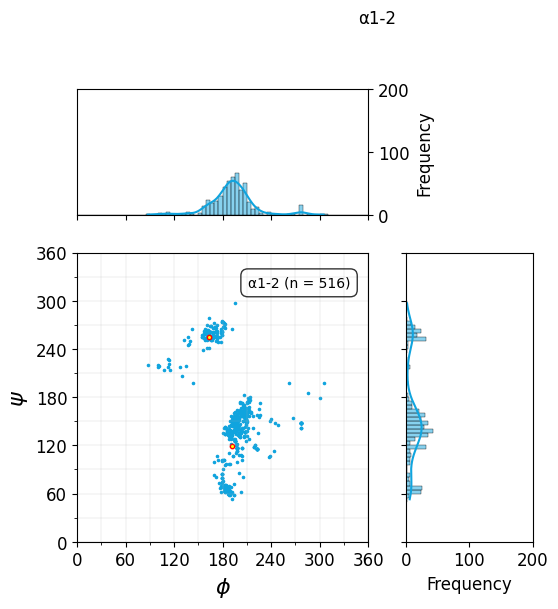

DManpa1-3DGlcpb_ver2.1.csv
phi: 196.41300000000004 , -0.0
psi: 106.42099999999999 , -0.0
2
2
DManpa1-3DGlcpa_ver2.1.csv
DGlcpa1-3DGlcpb_ver2.1.csv
LFucpa1-3DGlcpNAcb_ver2.1.csv
*********** LFucpa1-3DGlcpNAcb_ver2.1.csv
phi: 164.5914832226373 , 12.04137726396266
psi: 140.81070784902244 , 29.990245999725477
50
50
DGlcpa1-3DGlcpa_ver2.1.csv
phi: 183.95118966377302 , 8.186082685067616
psi: 103.33524109490918 , 43.94306464325418
8
8
DManpa1-3DManpb_ver2.1.csv
phi: 198.7456846505631 , 18.63543971455563
psi: 120.07146699998367 , 25.25200685965396
436
436
DGalpa1-3DGalpb_ver2.1.csv
phi: 201.76837496792186 , 23.79800009519093
psi: 97.8721223741959 , 29.380001494976007
42
42
DGlcpa1-3DFrupb_ver2.1.csv
DGalpa1-3DGlcpNAca_ver2.1.csv
phi: 201.14939624810003 , 2.6070123015259306
psi: 95.15224622725765 , 2.566098688079905
4
4
DGalpa1-3DGlcpNAcb_ver2.1.csv
phi: 205.5805833410687 , 1.6053950089365108
psi: 94.54786245606812 , 1.3962009413586385
3
3

 length of the data points :545,   , 545 




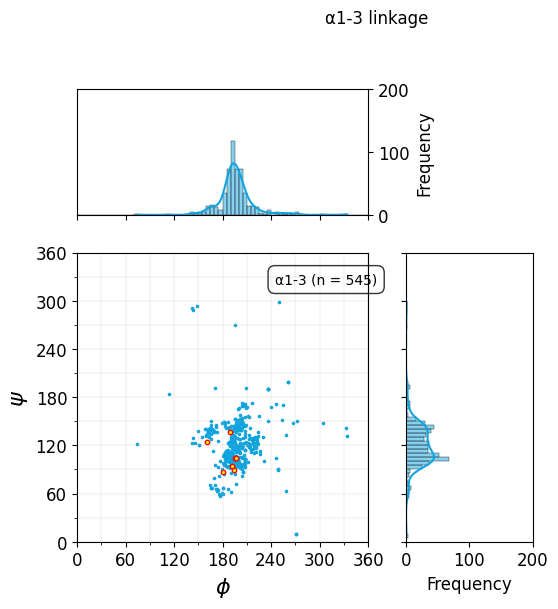

DGlcpNAca1-4DGlcpNAca_ver2.1.csv
LFucpa1-4DGlcpNAcb_ver2.1.csv
*********** LFucpa1-4DGlcpNAcb_ver2.1.csv
phi: 166.6502772824931 , 5.578129448964547
psi: 259.6310014408105 , 3.0139642605753334
15
15
DGlcpa1-4DGlcpa_ver2.1.csv
phi: 222.0505346170282 , 13.971529093174505
psi: 227.32855200115577 , 16.065910664068472
569
569
DManpa1-4DManpa_ver2.1.csv
DManpa1-4DGlcpNAcb_ver2.1.csv
phi: 259.6757694387354 , 18.528864794178002
psi: 242.53601410287098 , 14.047399676794416
5
5
DManpa1-4DManpb_ver2.1.csv
DGlcpNAca1-4DGlcpNAcb_ver2.1.csv
LFucpa1-4DGlcpNAca_ver2.1.csv
*********** LFucpa1-4DGlcpNAca_ver2.1.csv
DGlcpa1-4DGlcpb_ver2.1.csv
phi: 219.5537169617239 , 18.981333790655267
psi: 232.07409668512167 , 18.37135622849982
22
22
DManpa1-4DGlcpNAca_ver2.1.csv

 length of the data points :611,   , 611 




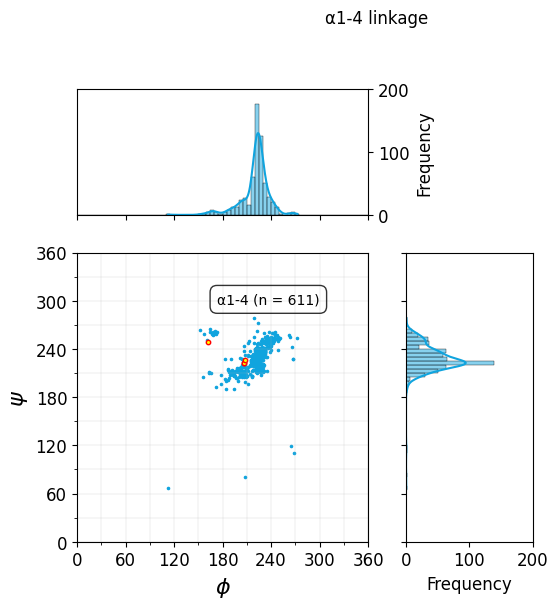

DManpa1-6DManpb_ver2.1.csv
phi: 193.42464563736308 , 21.732017021071524
psi: 164.5053423016999 , 42.54870104388423
387
387
DGalpa1-6DGlcpb_ver2.1.csv
DGalpa1-6DManpa_ver2.1.csv
DGlcpa1-6DGlcpNAcb_ver2.1.csv
phi: 187.1505 , 0.8045132181566377
psi: 88.59615000000002 , 4.4122301355624876
2
2
DGalpa1-6DGalpb_ver2.1.csv
DManpa1-6DManpa_ver2.1.csv
phi: 188.44866892872295 , 18.282501330464253
psi: 178.1790271594208 , 27.922380864814812
133
133
DGlcpa1-6DGlcpb_ver2.1.csv
phi: 191.4182825057793 , 4.058600075613971
psi: 181.15200173668225 , 11.584776572323848
7
7
DGlcpa1-6DGlcpa_ver2.1.csv
phi: 186.00115210597372 , 8.495306095231015
psi: 165.36975305998578 , 28.89565547683511
30
30
DGalpa1-6DGlcpa_ver2.1.csv
phi: 187.456348811431 , 8.043984010453887
psi: 148.74638074632935 , 39.86768044221487
18
18
DGalpa1-6DGalpa_ver2.1.csv
phi: 201.96859525300258 , 1.9420504413552382
psi: 223.81699891441673 , 1.1512978621695915
4
4
LFucpa1-6DGlcpNAcb_ver2.1.csv
*********** LFucpa1-6DGlcpNAcb_ver2.1.csv
phi: 16

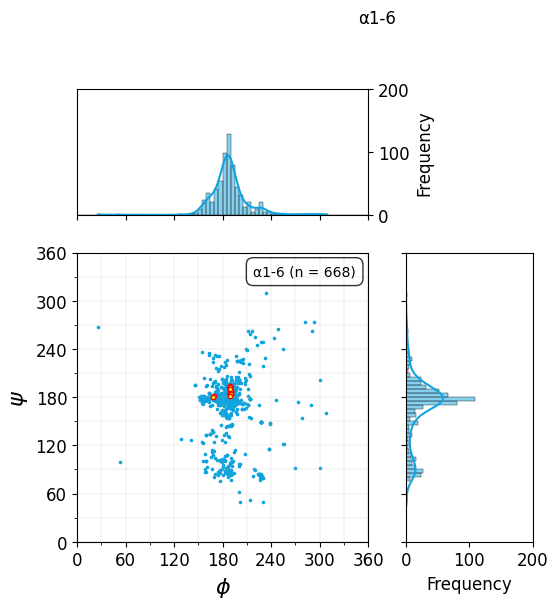

In [51]:
temp_list = [list1,]
filter_and_plot(temp_list)

temp_list = [list2,]
filter_and_plot(temp_list)

temp_list = [list3,]
filter_and_plot(temp_list)

temp_list = [list4,]
filter_and_plot(temp_list)

In [52]:
##################################################################

In [53]:
def filter_and_plot(list_linkage):

    # fig, ((ax4,ax3), (ax2, ax1)) = plt.subplots(2, 2, figsize=(8,8))

    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.3)

    # Create subplots with different sizes
    ax1 = fig.add_subplot(gs[1:3, :2])    
    ax2 = fig.add_subplot(gs[1:3, 2:3])  
    ax3 = fig.add_subplot(gs[0:1, :2]) 
    ax4 = fig.add_subplot(gs[0:1, 2:3]) 

    for linkage in list_linkage:
        file_path =linkage[0]
        files =linkage[1]
        link =linkage[2]
        title =linkage[3]
        legend_label =linkage[4]   
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7]     

        phi_values = []
        psi_values =[]

        for file in files:        

            if 'ver2.1' in file:
                print(file)
                df = pd.read_csv(f'{file_path}{file}')
                #filter df                
                if file.startswith ('LFucp'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4','4C1'])
                else:
                    df = filter_df(df, 0, 30, ['4C1','4C1'])
                ####################################################
                if not os.path.exists(f'./filter_data/{link}/'):
                    os.makedirs(f'./filter_data/{link}/')
                
                ############### save the filtered data ######################   
                if (df.shape[0]>0):
                    df.to_csv(f'./filter_data/{link}/{file[:-3]}_filtered.csv')
                
                #############################################################

                if df.shape[0] >1:
                    if 'phi' in df.columns:
                            # Append the values to our list
                            temp_phi_list = df['phi'].tolist()
                            phi_values.extend(temp_phi_list)
                            print(f'phi: {circular_mean(temp_phi_list)} , {circular_std_dev(temp_phi_list)}')
                    else:
                        print(f"Warning: 'phi' column not found in {file_path}{file}")

                    if 'psi' in df.columns:
                            # Append the values to our list
                            temp_psi_list = df['psi'].tolist()
                            psi_values.extend(temp_psi_list)
                            print(f'psi: {circular_mean(temp_psi_list)} , {circular_std_dev(temp_psi_list)}')
                    else:
                        print(f"Warning: 'psi' column not found in {file_path}{file}")
                
                    print (len(temp_phi_list))
                    print (len(temp_psi_list))

        x = phi_values
        y = psi_values

        print(f'\n length of the data points :{len(x)},   , {len(y)} \n')
        scatter =ax1.scatter(x, y, linewidth=1, linestyle='-', marker='.', s=10, label=f'{legend_label} (n = {len(x)})', color=color)        

        text_label = f'{legend_label} (n = {len(x)})'
        # Add a text box in the lower right corner
        # Get the current axis limits to position the text box
        xmin, xmax = ax1.get_xlim()
        ymin, ymax = ax1.get_ylim()
        # Position is relative to data coordinates
        text_box = ax1.text(1.07*xmax, 1.015*ymax, text_label,
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="none", alpha=0.8),
                        ha='right', va='bottom')
        
        ######################        
        max_histogram_scale = 20
        step_histogram_tick = 10

        #####################
        # Plot the histogram of the frequency on the right subplot (ax2)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(y=y, ax=ax2, bins=degree_bins, kde=True, palette=None, color=color,)
        ax2.set_xlabel('Frequency', fontsize =12)
        ax2.set_ylabel('') 
        ax2.set_xlim(xmin = 0, xmax = max_histogram_scale)
        ax2.set_ylim(ymin = 0, ymax = 360)
        ax2.set_yticks(range(0,361,60))
        # ax2.yaxis.tick_right()
        ax2.yaxis.set_ticklabels([])
        ax2.tick_params(axis='both', which='both', labelleft=False, labelsize = 12)
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000
        

        #####################
        # Plot the histogram of the frequency on the top subplot (ax3)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(x=x, ax=ax3, bins=degree_bins, kde=True, palette=None, color=color)

        # Move the y-axis label and ticks to the right side
        ax3.yaxis.set_label_position("right")
        ax3.yaxis.tick_right()

        ax3.set_ylabel('Frequency', fontsize =12)
        ax3.set_xlabel('') 
        ax3.set_ylim(ymin = 0, ymax = max_histogram_scale)
        ax3.set_xlim(xmin = 0, xmax = 360)
        ax3.set_xticks(range(0,361,60))
        ax3.tick_params(axis='both', which='both', labelbottom = False, labelsize = 12)  # Set tick font size
        ax3.yaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000

    
    #############################################      
    for linkage in list_linkage: 
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7] 
        for i in range(len(temp_phi)):
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=2, linestyle='-', marker='+', s=65, color='red',)
            # ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='+', s=55, color=color,)
            ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='o', s=10, edgecolors='red', facecolors='yellow')
     ##############################################
    
    print('')
    
    ax1.set_xlim(xmin=(0), xmax=360)
    ax1.set_ylim(ymin=(0), ymax=360)
    ax1.set_xticks(range(0,361,60))
    ax1.set_yticks(range(0,361,60))
    ax1.tick_params(axis='both', which='major', labelsize=11)   

    #############
    ax1.scatter([], [], linewidth=1, linestyle='-', marker='o', s=20, label = r'Carb Builder',  edgecolors='red', facecolors='none' )
    ax1.scatter([], [], linewidth=1, linestyle='-', marker='.', s=0.2, label = r'Crystal Structure', color="#888383" )
    
    # ax1.yaxis.tick_right()
    # ax1.yaxis.set_ticklabels([])
    
    # set the x and y axis labels
    ax1.set_xlabel(r'$\phi$ ', fontsize=16, fontweight='bold')
    ax1.set_ylabel(r'$\psi$', fontsize=16, fontweight='bold')
    # ax1.set_xlabel(r'$\phi$ (C$_2$-C$_1$-O$_x$-C$_x$)', fontsize=12,)
    # ax1.set_ylabel(r'$\psi$ (C$_1$-O$_x$-C$_x$-C$_{x+1}$)', fontsize=12)

    # ax1.set_xlabel(r'$\phi$', fontsize=12)
    # ax1.set_ylabel(r'$\psi$', fontsize=12)   
    
    # Keep ax4 visible but remove its axes
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['left'].set_visible(False)

    plt.subplots_adjust(wspace=0.02, hspace=0.02)
    fig.suptitle(title, fontsize=12)
    
    # #legend
    # handles, labels = ax1.get_legend_handles_labels()
    # items = list(zip(handles, labels))
    # custom_order = [0]
    # ordered_items = [items[i] for i in custom_order]
    # ordered_handles, ordered_labels = zip(*ordered_items)
    # # legend = ax4.legend(ordered_handles, ordered_labels, loc='center', bbox_to_anchor=(0.51, 0.94), fontsize=10)
    # # legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
    # #                 loc='upper right', bbox_to_anchor=(0.51, 0.94), 
    # #                 fontsize=10, frameon=True)
    # legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
    #                 loc='upper right', bbox_to_anchor=(0.49, 0.68), 
    #                 fontsize=10, frameon=True)

    # # # Get the legend from ax1 and place it in ax4
    # # legend = ax4.legend(*ax1.get_legend_handles_labels(), loc='center', fontsize=10)
    # # Now update the marker size in the legend
    # for handle in legend.legendHandles:
    #     handle._sizes = [100]  # Increase the marker size in the legend
    # if not legend:
    #     # If no legend was created (because no labels were set), create one manually
    #     handles = [scatter]
    #     labels = ['Glycosidic linkage']
    #     ax4.legend(handles, labels, loc='center', fontsize=16)

    # Show grid lines on the plots    
    ax1.set_xticks(range(0, 361, 30), minor=True) # Add minor ticks every 30 degrees (for grid lines)
    ax1.set_yticks(range(0, 361, 30), minor=True)
    ax1.grid(which='minor', linestyle='-', linewidth=0.3, alpha=0.5)
    ax1.grid(which='major', linestyle='-', linewidth=0.3, alpha=0.5)
    ax2.grid(False)
    ax3.grid(False)
    ax4.grid(False)

    ax4.set_visible(False)

    plt.savefig('./images/betalink.png',dpi=500)
    plt.savefig(f'./images/{title}.svg',dpi=500)
    # show the plot
    plt.show()

In [54]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_2D/'
files =os.listdir(file_path)
title = 'β1-2'
link = 'b1-2'
legend_label = 'β1-2'

# b1-2 linkage
# list1 = [ ]
temp_phi = [166.375, 167.063, 167.235]
temp_psi = [248.252, 251.383, 250.582]

#blind-friendly color
# color = '#DC267F'
# color = "#030303" 

list1 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [55]:
# file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_3D/'
file_path = './filter_data_copy/b1-3/'
files =os.listdir(file_path)
title = 'β1-3 linkage'
link = 'b1-3'
legend_label = 'β1-3'

# b1-3 linkage
# list1 = [DGalpb1-3DGalpb1-OH_min-gas.pdb, DManpb1-3DManpb1-OH_min-gas.pdb]
# temp_phi = [169.324, 168.266]
# temp_psi = [108.912, 128.072]

temp_phi = [169.324,]
temp_psi = [108.912,]

#blind-friendly color
# color = '#FFB000'

list2 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [56]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_4D/'
files =os.listdir(file_path)
title = 'β1-4'
link = 'b1-4'
legend_label = 'β1-4'

# b1-4 linkage
# list1 = [DGalpb1-4DGlcpNAcb1-OH_min-gas.pdb, DGlcpNAcb1-4DGlcpNAcb1-OH_min-gas.pdb, DManpb1-4DGlcpNAcb1-OH_min-gas.pdb ]
temp_phi = [167.211,165.385,168.482]
temp_psi = [245.770,245.917,244.232]

#blind-friendly color
# color = '#648FFF'

list3 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [57]:
# b1-6 linkage

file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_6D/'
files = os.listdir(file_path)
title = ''
link = 'b1-6'
legend_label = 'β1-6'

# b1-6 linkage
# # list1 = [DGalpb1-6DManpa1-OH_1ogg_min-gas.pdb, DGalpb1-6DManpa1-OH_1ogt_min-gas.pdb ]
# temp_phi = [167.928, 167.369]
# temp_psi = [184.018, 181.169]

# list1 = [DManpb1-6DManpb1-OH_1ogg_min-gas.pdb, DManpb1-6DManpb1-OH_1ogt_min-gas.pdb ]
temp_phi =[171.698, 170.477]
temp_psi =[180.171, 180.229]

#blind-friendly color
# color = '#4BE4AA'

list4 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

DGalpb1-2DXylpa_ver2.1.csv
phi: 163.12363160784344 , 8.057318367812286
psi: 210.44332394032435 , 10.119744584075844
10
10
DGlcpb1-2DGlcpb_ver2.1.csv
phi: 141.06640005408565 , 16.250601869575764
psi: 243.08628200160297 , 19.356060816743977
23
23
DXylpb1-2DManpb_ver2.1.csv
DGlcpb1-2DGlcpa_ver2.1.csv
phi: 141.64587576607641 , 20.612649818218372
psi: 240.32704370295696 , 25.21936784885781
5
5
DManpb1-2DManpb_ver2.1.csv
DManpb1-2DManpa_ver2.1.csv

 length of the data points :38,   , 38 




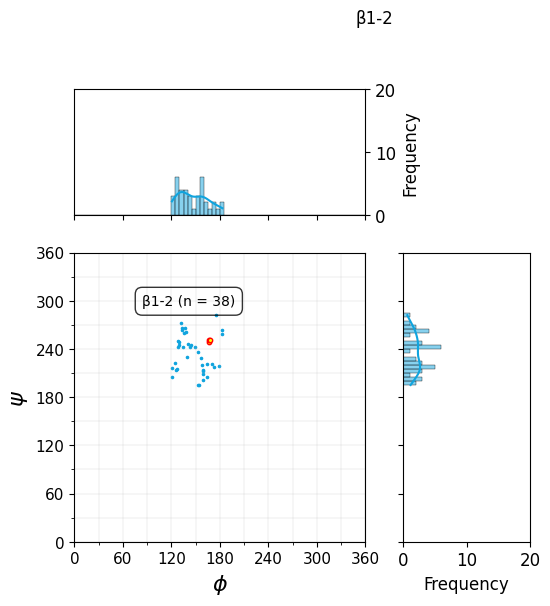

DManpb1-4DGlcpNAcb_ver2.1.csv
phi: 158.15524429856896 , 27.938933314261675
psi: 230.939841646045 , 27.045622796945533
826
826
DGalpb1-4DGlcpNAcb_ver2.1.csv
phi: 167.25329081680866 , 25.785753845141837
psi: 242.86048177657884 , 18.89083455719105
123
123
DGlcpNAcb1-4DGlcpNAcb_ver2.1.csv
phi: 160.80161054102996 , 23.396792775424608
psi: 232.03608870208666 , 26.940785974429904
2280
2280

 length of the data points :3229,   , 3229 




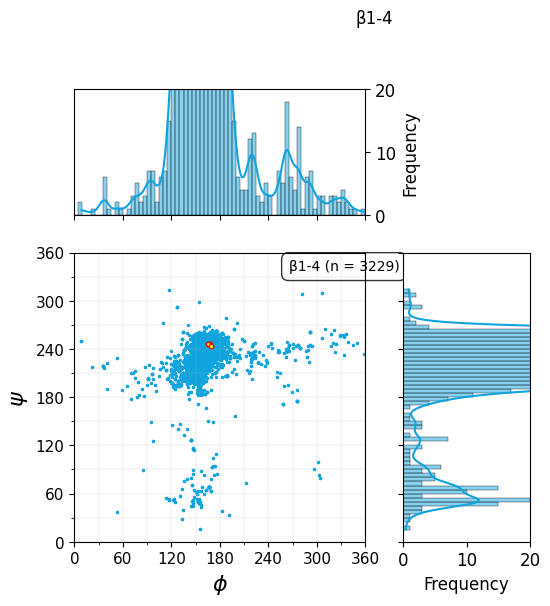

In [58]:
temp_list = [list1, ]
filter_and_plot(temp_list)

temp_list = [list3, ]
filter_and_plot(temp_list)

In [59]:
###############################################################

In [60]:
def filter_and_plot(list_linkage):

    fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, figsize=(8,8))

    for linkage in list_linkage:
        file_path =linkage[0]
        files =linkage[1]
        link =linkage[2]
        title =linkage[3]
        legend_label =linkage[4]   
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7]     

        phi_values = []
        psi_values =[]

        for file in files:        

            if 'ver2.csv' in file:
                print(file)
                df = pd.read_csv(f'{file_path}{file}')
                #filter df                
                if file.startswith ('DNeup5Ac'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4', '4C1'])
                elif file.startswith ('DNeup5Aca2-8DNeup5Ac'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4', '1C4'])
                else:
                    df = filter_df(df, 0, 30, ['4C1', '4C1'])
                ####################################################
                if not os.path.exists(f'./filter_data/{link}/'):
                    os.makedirs(f'./filter_data/{link}/')
                
                ############### save the filtered data ######################   
                if (df.shape[0]>0):
                    df.to_csv(f'./filter_data/{link}/{file[:-3]}_filtered.csv')
                
                #############################################################

                if df.shape[0] >1:
                    if 'phi' in df.columns:
                            # Append the values to our list
                            temp_phi_list = df['phi'].tolist()
                            phi_values.extend(temp_phi_list)
                            print(f'phi: {circular_mean(temp_phi_list)} , {circular_std_dev(temp_phi_list)}')
                    else:
                        print(f"Warning: 'phi' column not found in {file_path}{file}")

                    if 'psi' in df.columns:
                            # Append the values to our list
                            temp_psi_list = df['psi'].tolist()
                            psi_values.extend(temp_psi_list)
                            print(f'psi: {circular_mean(temp_psi_list)} , {circular_std_dev(temp_psi_list)}')
                    else:
                        print(f"Warning: 'psi' column not found in {file_path}{file}")
                
                    print (len(temp_phi_list))
                    print (len(temp_psi_list))

        x = phi_values
        y = psi_values

        print(f'\n length of the data points :{len(x)},   , {len(y)} \n')
        scatter =ax1.scatter(x, y, linewidth=1, linestyle='-', marker='.', s=10, label=f'{legend_label} (n = {len(x)})', color=color)

        max_histogram_scale = 40
        step_histogram_tick = 10

        #####################
        # Plot the histogram of the frequency on the right subplot (ax2)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(y=y, ax=ax2, bins=degree_bins, kde=True, palette=None, color=color)
        ax2.set_xlabel('Frequency', fontsize =12)
        ax2.set_ylabel('') 
        ax2.set_xlim(xmin = 0, xmax = max_histogram_scale)
        ax2.set_ylim(ymin = 0, ymax = 360)
        ax2.set_yticks(range(0,361,60))
        ax2.tick_params(axis='both', which='both', labelleft =False, labelsize=11)
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000
            

        #####################
        # Plot the histogram of the frequency on the top subplot (ax3)
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(x=x, ax=ax3, bins=degree_bins, kde=True, palette=None, color=color)
        ax3.set_ylabel('Frequency', fontsize =12)
        ax3.set_xlabel('') 
        ax3.set_ylim(ymin = 0, ymax = max_histogram_scale)
        ax3.set_xlim(xmin = 0, xmax = 360)
        ax3.set_xticks(range(0,361,60))
        ax3.tick_params(axis='both', which='both', labelbottom = False, labelsize = 11)  # Set tick font size
        ax3.yaxis.set_major_locator(ticker.MultipleLocator(base=step_histogram_tick))  # Set x-ticks at a distance of 50,000

        # ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))  # No scientific notation
        # ax3.tick_params(axis='y', which='major', pad=8)  # Add padding between ticks and labels

    
    #############################################      
    for linkage in list_linkage: 
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7] 
        for i in range(len(temp_phi)):
            ax1.scatter(temp_phi[i], temp_psi[i], linewidth=2, linestyle='-', marker='+', s=60, color='black', )
            ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='+', s=55, color=color,)
        ##############################################
    
    print('')
    
    ax1.set_xlim(xmin=(0), xmax=360)
    ax1.set_ylim(ymin=(0), ymax=360)

    #############
    ax1.scatter([], [], linewidth=1, linestyle='-', marker='+', s=60, label = r'Predicted structure', color='black' )
    # set the x and y axis labels
    ax1.set_xlabel(r'$\phi$', fontsize=12)
    ax1.set_ylabel(r'$\psi$', fontsize=12)

    # ax1.set_xlabel(r'$\phi$ (C$_3$-C$_2$-O$_x$-C$_x$)', fontsize=12)
    # ax1.set_ylabel(r'$\psi$ (C$_2$-O$_x$-C$_x$-C$_{x+1}$)', fontsize=12)

    # ax1.set_xlabel(r'$\phi$', fontsize=12)
    # ax1.set_ylabel(r'$\psi$', fontsize=12)

    ax1.set_xticks(range(0,361,60))
    ax1.set_yticks(range(0,361,60))
    ax1.tick_params(axis='both', which='major', labelsize=11)

    # Keep ax4 visible but remove its axes
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['left'].set_visible(False)

    plt.subplots_adjust(wspace=0.06, hspace=0.06)
    fig.suptitle(title, fontsize=12)

    
    #legend
    handles, labels = ax1.get_legend_handles_labels()
    items = list(zip(handles, labels))
    custom_order = [val for val in range(len(list_linkage)+1)]
    ordered_items = [items[i] for i in custom_order]
    ordered_handles, ordered_labels = zip(*ordered_items)
    # legend = ax4.legend(ordered_handles, ordered_labels, loc='center', fontsize=10)

    # Create a custom legend in the same position where ax4 was
    legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
                    loc='upper right', bbox_to_anchor=(0.9,0.8), 
                    fontsize=10, frameon=True)

    # # Get the legend from ax1 and place it in ax4
    # legend = ax4.legend(*ax1.get_legend_handles_labels(), loc='center', fontsize=10)
    # Now update the marker size in the legend
    for handle in legend.legendHandles:
        handle._sizes = [100]  # Increase the marker size in the legend
    if not legend:
        # If no legend was created (because no labels were set), create one manually
        handles = [scatter]
        labels = ['Glycosidic linkage']
        ax4.legend(handles, labels, loc='center', fontsize=16)

    # Show grid lines on the plots
    ax1.set_xticks(range(0, 361, 30), minor=True) # Add minor ticks every 30 degrees (for grid lines)
    ax1.set_yticks(range(0, 361, 30), minor=True)
    ax1.grid(which='minor', linestyle='-', linewidth=0.3, alpha=0.5)
    ax1.grid(which='major', linestyle='-', linewidth=0.3, alpha=0.5)
    ax2.grid(False)
    ax3.grid(False)
    ax4.grid(False)

    ax4.set_visible(False)

    plt.savefig('./images/Neu5Ac_link.png',dpi=500)
    plt.savefig('./images/Neu5Ac_link.svg',dpi=500)
    # show the plot
    plt.show()

In [61]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a2_3D_ver2/'
files =os.listdir(file_path)
title = ''
link = 'a2-3'
legend_label = 'α2-3'

# a2-3 linkage
# list1 = [DNeup5Aca2-3DGalpb1-OH_1ht_min-gas.pdb ]
# temp_phi = [71.4498]
# temp_psi = [96.2014]

# # case C1-C2-O3-C3-C4 for phi
temp_phi = [190.24, 293.27]
temp_psi = [96.2014, 111.42]

#blind-friendly color
color = '#DC267F'

list1 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [62]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a2_6D_ver2/'
files =os.listdir(file_path)
title = ''
link = 'a2-6'
legend_label = 'α2-6'

# a2-3 linkage
# list1 = [DNeup5Aca2-6DGalpb1-OH_1ht_ogg_min-gas.pdb, DNeup5Aca2-6DGlcpNAca1-OH_1ht_ogg_min-gas.pdb]
# temp_phi = [61.817, 65.3878]
# temp_psi = [171.325, 175.921]

# # case C1-C2-O6-C6-C5 for phi
temp_phi = [181.335, 292.4602, 184.645, 293.7162 ]
temp_psi = [171.325, 177.265, 175.921, 180.775 ]

#blind-friendly color
color = '#FFB000'

list2 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [63]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a2_8D/'
files =os.listdir(file_path)
title = ''
link = 'a2-8'
legend_label = 'α2-8'

# a2-8 linkage
# list1 = [ ]
temp_phi = []
temp_psi = []

#blind-friendly color
color = '#648FFF'

list3 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

DNeup5Aca2-3DGalpb_ver2.csv
*********** DNeup5Aca2-3DGalpb_ver2.csv
phi: 289.5409977342126 , 50.528001149809285
psi: 107.96299352000977 , 14.654169309239949
104
104

 length of the data points :104,   , 104 

DNeup5Aca2-6DGalpb_ver2.csv
*********** DNeup5Aca2-6DGalpb_ver2.csv
phi: 303.39205383622095 , 5.423750655216171
psi: 146.88235752133374 , 42.90526719521503
14
14
DNeup5Aca2-6DGlcpNAcb_ver2.csv
*********** DNeup5Aca2-6DGlcpNAcb_ver2.csv
DNeup5Aca2-6DGalpa_ver2.csv
*********** DNeup5Aca2-6DGalpa_ver2.csv
DNeup5Aca2-6DGlcpNAca_ver2.csv
*********** DNeup5Aca2-6DGlcpNAca_ver2.csv
phi: 297.7033045293573 , 4.15631041635809
psi: 246.64398872943335 , 2.174498657386988
4
4

 length of the data points :18,   , 18 




/tmp/ipykernel_556923/1560724544.py:159: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


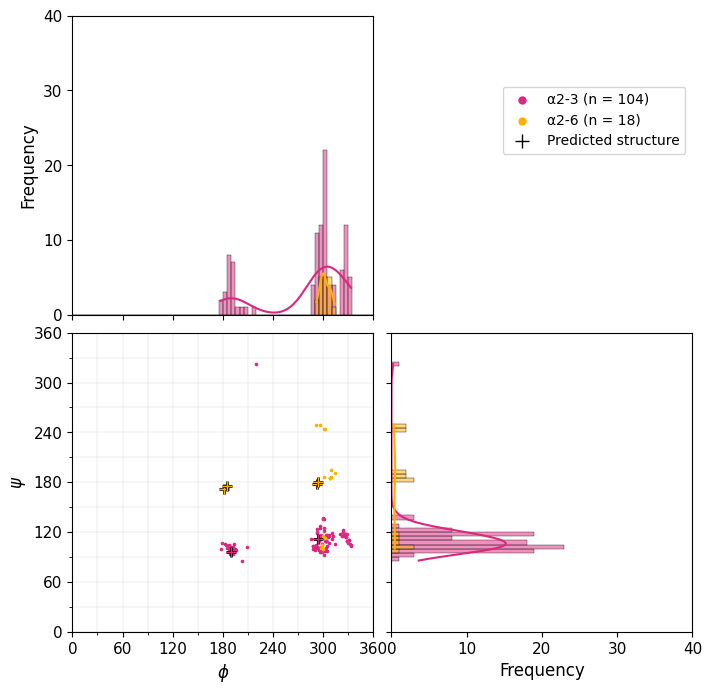

In [64]:
temp_list = [list1, list2, ]
filter_and_plot(temp_list)

In [65]:
###########################################################################################################

In [66]:
# plot the omega angles 

In [67]:
def filter_and_plot(list_linkage):

    fig, (ax1) = plt.subplots(1,1, figsize=(4,4))

    for linkage in list_linkage:
        file_path =linkage[0]
        files =linkage[1]
        link =linkage[2]
        title =linkage[3]
        legend_label =linkage[4]   
        temp_phi = linkage[5]
        temp_psi = linkage[6]
        color = linkage[7]     

        phi_values = []
        psi_values =[]

        for file in files:        

            if 'ver2.1' in file:
                print(file)
                df = pd.read_csv(f'{file_path}{file}')
                #filter df                
                if file.startswith ('LFucp'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4','4C1'])
                elif file.startswith ('DNeup5Ac'):
                    print (f'*********** {file}')
                    df = filter_df(df, 0, 30, ['1C4','4C1'])
                else:
                    df = filter_df(df, 0, 30, ['4C1','4C1'])
                ####################################################
                if not os.path.exists(f'./filter_data/{link}/'):
                    os.makedirs(f'./filter_data/{link}/')
                
                ############### save the filtered data ######################   
                if (df.shape[0]>0):
                    df.to_csv(f'./filter_data/{link}/{file[:-3]}_omega_filtered.csv')
                
                #############################################################

                if df.shape[0] >1:
                    if 'phi' in df.columns:
                            # Append the values to our list
                            temp_phi_list = df['phi'].tolist()
                            phi_values.extend(temp_phi_list)
                            print(f'phi: {circular_mean(temp_phi_list)} , {circular_std_dev(temp_phi_list)}')
                    else:
                        print(f"Warning: 'phi' column not found in {file_path}{file}")

                    if 'psi' in df.columns:
                            # Append the values to our list
                            temp_psi_list = df['psi'].tolist()
                            psi_values.extend(temp_psi_list)
                            print(f'psi: {circular_mean(temp_psi_list)} , {circular_std_dev(temp_psi_list)}')
                    else:
                        print(f"Warning: 'psi' column not found in {file_path}{file}")
                
                    print (len(temp_phi_list))
                    print (len(temp_psi_list))

        x = phi_values
        y = psi_values

        print(f'\n length of the data points :{len(x)},   , {len(y)} \n')
        bins = range(0, 365, 5)
        # ax1.hist(y, bins=bins, color=color, edgecolor='black', alpha=0.7, 
        #          label=f'{legend_label} (n = {len(y)})')
        
        # Add KDE plot 
        ###################
        degree_bins = np.arange(0, 365, 5)
        sns.histplot(x=x, ax=ax1, bins=degree_bins, kde=True, palette=None, color=color, label=f'{legend_label} (n = {len(y)})')
    
    ##############################################    
    # for linkage in list_linkage: 
    #     temp_phi = linkage[5]
    #     temp_psi = linkage[6]
    #     color = linkage[7] 
    #     for i in range(len(temp_phi)):
    #         ax1.scatter(temp_phi[i], temp_psi[i], linewidth=2, linestyle='-', marker='+', s=60, color='black', )
    #         ax1.scatter(temp_phi[i], temp_psi[i], linewidth=1, linestyle='-', marker='+', s=55, color='black',)
    ##############################################
    
    print('')
    
    ax1.set_xlim(xmin=(0), xmax=360)
    ax1.set_ylim(ymin=(0), ymax=100)

    #############
    ax1.scatter([], [], linewidth=1, linestyle='-', marker='+', s=60, label = r'Carb Builder', color='black' )
    
    # set the x and y axis labels
    # ax1.set_xlabel(r'$\omega$ (O$_6$-C$_6$-C$_5$-C$_4$)', fontsize=12)
    ax1.set_xlabel(r'$\omega$', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)

    ax1.set_xticks(range(0,361,60))
    ax1.tick_params(axis='both', which='major', labelsize=11)
    ax1.set_xticks(range(0, 361, 30), minor=True) # Add minor ticks every 30 degrees 

    # fig.suptitle(title, fontsize=12)

    #legend
    handles, labels = ax1.get_legend_handles_labels()
    items = list(zip(handles, labels))
    custom_order = [1,2,0]
    ordered_items = [items[i] for i in custom_order]
    ordered_handles, ordered_labels = zip(*ordered_items)
    # legend = ax4.legend(ordered_handles, ordered_labels, loc='center', fontsize=10)

    # Create a custom legend in the same position where ax4 was
    legend = fig.legend(handles=ordered_handles, labels=ordered_labels, 
                    loc='upper right', bbox_to_anchor=(0.93,0.95), 
                    fontsize=10, frameon=True)

    # # Get the legend from ax1 and place it in ax4
    # legend = ax4.legend(*ax1.get_legend_handles_labels(), loc='center', fontsize=10)
    # Now update the marker size in the legend
    for handle in legend.legendHandles:
        handle._sizes = [100]  # Increase the marker size in the legend
    if not legend:
        # If no legend was created (because no labels were set), create one manually
        handles = [scatter]
        labels = ['Glycosidic linkage']
        ax1.legend(handles, labels, loc='upper right', fontsize=16)


    plt.tight_layout()
    plt.savefig('./images/omega1-6link_histogram.png',dpi=500)
    plt.savefig('./images/omega1-6link_histogram.svg',dpi=500)
    # show the plot
    plt.show()

In [68]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a1_6_omega1_2/'
files =os.listdir(file_path)
title = ''
link = 'a1-6'
legend_label = 'α1-6'

# a1-6 linkage
# list1 = [ ]
temp_phi = [67.66, 188.08, 55.83, 185.853, 55.805, 185.897, 54.8642, 184.518, 55.5952, 185.272, 55.2681, 183.99, 55.8993, 185.791, 56.4851, 185.319, 58.2925, 187.648]
temp_psi = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#blind-friendly color
color = '#4BE4AA'

list1 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [69]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_6_omega1_2/'
files =os.listdir(file_path)
title = ''
link = 'b1-6'
legend_label = 'β1-6'

# b1-6 linkage
# list1 = [DNeup5Aca2-3DGalpb1-OH_1ht_min-gas.pdb ]
temp_phi = []
temp_psi = []

#blind-friendly color
color = 'blue'

list2 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

In [70]:
# file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/b1_6_omega1_2/'
# file = 'DManpb1-6DManpb_ver2.1.csv'
# df = pd.read_csv(f'{file_path}{file}')
# filtered_df =filter_df(df, 0, 30, ['4C1', '4C1'])
# print(filtered_df)

In [71]:
# for the omega in the a2-6D linakge

In [72]:
file_path = '/home/rajan/Desktop/PDB_glycosidic_linkage_information_CB_builder_data/result/a2_6D_omega1_2/'
files =os.listdir(file_path)
title = ''
link = 'a2-6'
legend_label = 'α2-6'

# a2-6 linkage
# list1 = [DNeup5Aca2-3DGalpb1-OH_1ht_min-gas.pdb ]
temp_phi = [65.88, 65.99, 56.22, 56.56]
temp_psi = [1,1,1,1]

#blind-friendly color
color = '#FFB000'

list3 = [file_path, files, link, title, legend_label, temp_phi, temp_psi, color]

DManpa1-6DManpb_ver2.1.csv
phi: 339.634755914946 , 75.5467896412439
psi: 100.24020313540484 , 75.57607206565041
387
387
DGlcpa1-6DGlcpNAcb_ver2.1.csv
phi: 84.28925000000004 , 2.322768106982686
psi: 209.22099999999998 , 3.5761608665561946
2
2
DManpa1-6DManpa_ver2.1.csv
phi: 328.2493868257153 , 67.7551460424172
psi: 88.96213541222926 , 68.12452506099322
133
133
DGlcpa1-6DGlcpb_ver2.1.csv
phi: 344.74705845252595 , 73.38436566019017
psi: 106.72300146807419 , 73.16902753948612
7
7
DGlcpa1-6DGlcpa_ver2.1.csv
phi: 19.600611286147966 , 92.1570605638892
psi: 141.53316111630807 , 93.28506842645368
30
30
DGalpa1-6DGlcpa_ver2.1.csv
phi: 68.28716226132963 , 53.426258863916196
psi: 188.03538690261513 , 53.0993527889541
18
18
DGalpa1-6DGalpa_ver2.1.csv
phi: 88.0125767542782 , 1.173639135426684
psi: 212.07574543102564 , 0.952184834740391
4
4
LFucpa1-6DGlcpNAcb_ver2.1.csv
*********** LFucpa1-6DGlcpNAcb_ver2.1.csv
phi: 301.08439332108696 , 45.126802549394384
psi: 62.19960950166961 , 45.16203572094911
85

/tmp/ipykernel_556923/3463500557.py:120: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


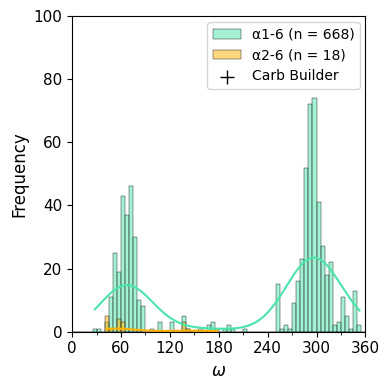

In [73]:
temp_list = [list1, list3]
filter_and_plot(temp_list)

In [74]:
###############################################################
#### make the excel file 

In [75]:
import os
import pandas as pd
import glob
from pathlib import Path
import subprocess
import sys

def install_required_packages():
    """
    Install required packages if they don't exist
    """
    required_packages = ['openpyxl']
    
    for package in required_packages:
        try:
            __import__(package)
            print(f"Package '{package}' is already installed.")
        except ImportError:
            print(f"Installing required package: {package}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"Successfully installed {package}")

def combine_csv_to_excel(input_dir='.', output_file='combined_data.xlsx'):
    """
    Combine all CSV files in the input directory into a single Excel file
    with multiple sheets named after the original CSV files.
    
    Parameters:
    -----------
    input_dir : str, default='.'
        Directory containing CSV files
    output_file : str, default='combined_data.xlsx'
        Name of the output Excel file
    
    Returns:
    --------
    str
        Path to the created Excel file
    """
    # install required packages 
    install_required_packages()

    # Get all CSV files in the directory
    csv_files = glob.glob(os.path.join(input_dir, '*.csv'))
    
    if not csv_files:
        print(f"No CSV files found in directory: {input_dir}")
        return None
    
    print(f"Found {len(csv_files)} CSV files to process")
    
    # Create an Excel writer object
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for csv_file in csv_files:
            # Get the filename without extension to use as sheet name
            file_name = Path(csv_file).stem
            
            # Read the CSV file
            print(f"Processing: {csv_file}")
            try:
                # Try to auto-detect CSV dialect
                df = pd.read_csv(csv_file, encoding='utf-8')
                
                # Excel sheet names have a maximum length of 31 characters
                sheet_name = file_name[:-17]
                
                # Write the dataframe to the Excel file
                df.to_excel(writer, sheet_name=sheet_name, index=False)
                print(f"Added sheet: {sheet_name}")
                
            except Exception as e:
                print(f"Error processing {csv_file}: {str(e)}")
    
    print(f"Successfully created Excel file: {output_file}")
    return output_file

   

In [76]:
# You can customize the input directory and output file name
input_directory = "./filter_data/a1-2/"  # Current directory
output_excel = "./filter_data/a1-2/a1-2_data.xlsx"

result = combine_csv_to_excel(input_directory, output_excel)

if result:
    print(f"All CSV files have been combined into: {result}")
else:
    print("Failed to create combined Excel file")

Package 'openpyxl' is already installed.
Found 4 CSV files to process
Processing: ./filter_data/a1-2/DManpa1-2DManpa_ver2.1._filtered.csv
Added sheet: DManpa1-2DManpa
Processing: ./filter_data/a1-2/DManpa1-2DGlcpb_ver2.1._filtered.csv
Added sheet: DManpa1-2DGlcpb
Processing: ./filter_data/a1-2/LFucpa1-2DGalpb_ver2.1._filtered.csv
Added sheet: LFucpa1-2DGalpb
Processing: ./filter_data/a1-2/DManpa1-2DManpb_ver2.1._filtered.csv
Added sheet: DManpa1-2DManpb
Successfully created Excel file: ./filter_data/a1-2/a1-2_data.xlsx
All CSV files have been combined into: ./filter_data/a1-2/a1-2_data.xlsx
